# Week 7. 쉽고 강력한 데이터프레임 라이브러리 - Pandas

<br><br><br>

# pandas 데이터 입출력
--------------------------
Pandas에서 구조화하여 입출력 할 수 있는 데이터의 종류는 다음과 같음
- CSV
- Clipboard
- Excel
- JSON
- HTML
- Python Pickling
- HDF5
- SAS
- STATA
- SQL query
- Google BigQuery

여기서는 중요하다고 생각하는 csv, html, json, sas 파일을 주로 다루려고 함.

## CSV(Comma Separated Values) 파일 입출력
인터넷 상의 csv 파일은 파일 path 대신 URL을 지정하면 다운로드하여 import

In [1]:
import pandas as pd
import numpy as np

In [18]:
# pd.read_table('data/pandas-1.csv',sep=',')
df = pd.read_csv('data/pandas-1.csv') 
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [19]:
df2 = pd.read_csv('data/pandas-1.csv', header=None, names=['d', 'e', 'f', 'message2'], nrows=3)
df2

,d,e,f,message2
a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world


In [20]:
df2.to_csv('data/pandas-1-output.csv', index=True, header=True)

## 인터넷 상의 데이터베이스 자료 입력
다음과 같은 인터넷 상의 자료는 pandas_datareader 패키지의 `DataReader` 을 써서 바로 pandas로 입력 가능

- Yahoo! Finance
- Google Finance
- St.Louis FED (FRED)
- Kenneth French’s data library
- World Bank
- Google Analytics

In [24]:
df = pd.read_csv('http://www.football-data.co.uk/mmz4281/1617/E0.csv')
df.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,13/08/16,Burnley,Swansea,0,1,A,0,0,D,...,1.61,32,-0.25,2.13,2.06,1.86,1.81,2.79,3.16,2.89
1,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0,0,D,...,1.52,33,-0.50,2.07,2.00,1.90,1.85,2.25,3.15,3.86
2,E0,13/08/16,Everton,Tottenham,1,1,D,1,0,H,...,1.77,32,0.25,1.91,1.85,2.09,2.00,3.64,3.54,2.16
3,E0,13/08/16,Hull,Leicester,2,1,H,1,0,H,...,1.67,31,0.25,2.35,2.26,2.03,1.67,4.68,3.50,1.92
4,E0,13/08/16,Man City,Sunderland,2,1,H,1,0,H,...,2.48,34,-1.50,1.81,1.73,2.20,2.14,1.25,6.50,14.50
5,E0,13/08/16,Middlesbrough,Stoke,1,1,D,1,0,H,...,1.53,32,-0.25,1.99,1.93,1.97,1.92,2.20,3.38,3.70
6,E0,13/08/16,Southampton,Watford,1,1,D,0,1,A,...,1.75,33,-0.75,2.16,2.07,1.89,1.80,1.80,3.83,4.91
7,E0,14/08/16,Arsenal,Liverpool,3,4,A,1,1,D,...,1.99,31,-0.50,2.41,2.31,1.81,1.64,2.80,3.44,2.68
8,E0,14/08/16,Bournemouth,Man United,1,3,A,0,1,A,...,1.76,33,0.75,1.80,1.76,2.17,2.11,5.40,3.65,1.78
9,E0,15/08/16,Chelsea,West Ham,2,1,H,0,0,D,...,2.01,33,-1.00,2.20,2.10,1.80,1.76,1.52,4.38,7.45


In [27]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2016, 6, 30)

df = web.DataReader("KRX:005930", 'google', start, end)
df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2016-06-17,1410000.0,1435000.0,1410000.0,1426000.0,328256
2016-06-20,1427000.0,1448000.0,1426000.0,1431000.0,268408
2016-06-21,1432000.0,1449000.0,1426000.0,1448000.0,193560
2016-06-22,1446000.0,1450000.0,1431000.0,1445000.0,177102
2016-06-23,1444000.0,1445000.0,1427000.0,1430000.0,224121
2016-06-24,1445000.0,1445000.0,1360000.0,1400000.0,408920
2016-06-27,1400000.0,1405000.0,1385000.0,1398000.0,236573
2016-06-28,1390000.0,1404000.0,1379000.0,1399000.0,213829
2016-06-29,1408000.0,1412000.0,1391000.0,1396000.0,208090


In [8]:
df.describe()

,Open,High,Low,Close,Volume
count,3.690000e+02,3.690000e+02,3.690000e+02,3.690000e+02,3.690000e+02
mean,1.286794e+06,1.299163e+06,1.273528e+06,1.286168e+06,2.312324e+05
std,1.011217e+05,1.006842e+05,9.993101e+04,1.004128e+05,1.024175e+05
min,1.068000e+06,1.074000e+06,1.033000e+06,1.067000e+06,9.177900e+04
25%,1.224000e+06,1.251000e+06,1.216000e+06,1.229000e+06,1.721340e+05
50%,1.287000e+06,1.298000e+06,1.272000e+06,1.284000e+06,2.039380e+05
75%,1.360000e+06,1.372000e+06,1.345000e+06,1.359000e+06,2.634640e+05
max,1.510000e+06,1.510000e+06,1.486000e+06,1.503000e+06,1.198180e+06


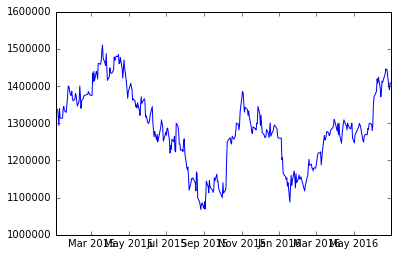

In [30]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(df['Open'])

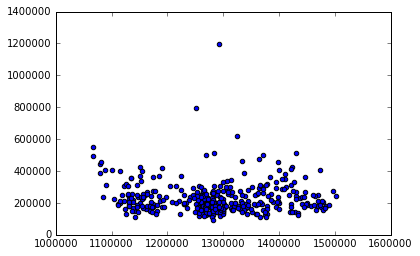

In [36]:
plt.scatter(df['Close'],df['Volume'])

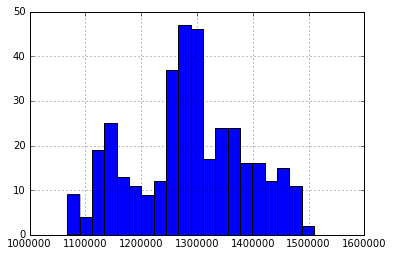

In [37]:
df['Open'].hist(bins=20)

{'boxes': [<matplotlib.lines.Line2D at 0x806a6b0>,
 'caps': [<matplotlib.lines.Line2D at 0x8076590>,
 'fliers': [<matplotlib.lines.Line2D at 0x8076fb0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x8076af0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x806ac90>,
  <matplotlib.lines.Line2D at 0x8086f50>]}

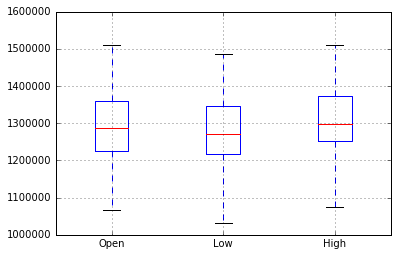

In [10]:
df.boxplot(column=['Open','Low','High'], return_type='dict')

<br><br><br>

# pandas 데이터 합성
--------------------

## Merge
`merge` 명령은 두 데이터 프레임의 공통 열 혹은 인덱스를 기준으로 데이터베이스 테이블 조인(join)과 같이 두 개의 테이블을 합친다.

`merge` 명령으로 두 데이터프레임 합치면, 공통 열을 기준으로 데이터를 찾아서 합친다.

<br>
```python
pd.merge(df1, df2, how='방식', on=['key1','key2'])
```

### how
- outer : null 이 있어도 양쪽 데이터를 모두 보여줌, 이름이 같은 열은 모두 기준 열로 사용된다.
- left, right : left는 첫번째 데이터프레임 기준 merge

### on
- 명시적 기준열 설정

In [4]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 
                    'data1': range(7)})
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [5]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [6]:
pd.merge(df1, df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [7]:
pd.merge(df1, df2, how='outer')

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


In [8]:
pd.merge(df1, df2, how='left')

,data1,key,data2
0,0,b,1.0
1,1,b,1.0
2,2,a,0.0
3,3,c,NaN
4,4,a,0.0
5,5,a,0.0
6,6,b,1.0


### 기준열이 데이터 프레임마다 다르다면?
> 각각의 데이터프레임에 대해 다르게 정하려면 `left_on`, `right_on`, `left_index`, `right_index` 인수를 사용함

In [45]:
df1 = pd.DataFrame({'key1': ['foo', 'foo', 'bar'], 
                    'key2': ['one', 'two', 'one'], 
                    'lval': [1, 2, 3]})
df1

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [12]:
df2 = pd.DataFrame({'k1': ['foo', 'foo', 'bar', 'bar'],
                    'k2': ['one', 'one', 'one', 'two'],
                    'rval': [4, 5, 6, 7]})
df2

,k1,k2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [13]:
pd.merge(df1, df2, left_on='key1', right_on="k1")

,key1,key2,lval,k1,k2,rval
0,foo,one,1,foo,one,4
1,foo,one,1,foo,one,5
2,foo,two,2,foo,one,4
3,foo,two,2,foo,one,5
4,bar,one,3,bar,one,6
5,bar,one,3,bar,two,7


## Join
`merge` 대신 사용 할 수 있음(똑같이 사용)

## Concat
`concat` 명령을 사용하면 기준 열(key column)을 사용하지 않고 단순히 데이터를 추가한다.

기본적으로는 아래에 데이터 행을 덧붙이지만 (인덱스가 중복됨) `axis=1`로 인수를 설정하면 인덱스 기준으로 옆으로 데이터 열를 덧붙인다.

In [9]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [10]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [11]:
s4 = pd.concat([s1, s2, s3], axis=1)
s4

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [17]:
s4.isnull().sum(axis=0)

0    5
1    4
2    5
dtype: int64

In [18]:
s4.fillna(method='pad')

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,1.0,2.0,NaN
d,1.0,3.0,NaN
e,1.0,4.0,NaN
f,1.0,4.0,5.0
g,1.0,4.0,6.0


In [20]:
s4.fillna(s4.mean(axis=0))

,0,1,2
a,0.0,3.0,5.5
b,1.0,3.0,5.5
c,0.5,2.0,5.5
d,0.5,3.0,5.5
e,0.5,4.0,5.5
f,0.5,3.0,5.0
g,0.5,3.0,6.0


<br><br><br>

# pandas 기본 연산
---------------------------
- 연산 방향: `axis=1` 인 경우 행방향

In [88]:
np.random.seed(1)
df = pd.DataFrame(np.random.randint(10, size=(4, 8)))
df

,0,1,2,3,4,5,6,7
0,5,8,9,5,0,0,1,7
1,6,9,2,4,5,2,4,2
2,4,7,7,9,1,7,0,6
3,9,9,7,6,9,1,0,1


In [89]:
# 열 합계
df['sum']= df.sum(axis=1)
df

,0,1,2,3,4,5,6,7,sum
0,5,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42


In [90]:
# 헹 합계
df.ix['Total'] = df.sum(axis=0)
df

,0,1,2,3,4,5,6,7,sum
0,5,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42
Total,24,33,25,24,15,10,5,16,152


## 그룹 연산
그룹 연산은 피봇 테이블과 달리 키에 의해서 결정되는 데이터가 복수개가 있어도 괜찮다. 대신 연산을 통해 복수개의 그룹 데이터에 대한 대표값을 정한다. 이를 split-apply-combine 연산이라고도 한다.

- split 단계
    - 특정 Key 값에 따라 데이터 그룹을 만든다.
    
    
- apply 단계
    - 각각의 그룹에 대해 원하는 연산을 하여 대표값을 생성한다.
    - `count()`, `mean()`, `median()`, `min()`, `max()`
    - `sum()`, `prod()`, `std()`, `var()`, `quantile()`
    - `first()`, `last()`


- Combine 단계
    - 그룹의 Key 값에 대해 원하는 연산의 결과를 Value로 지정한 dict를 생성한다.
    
<img src="https://datascienceschool.net/upfiles/5cf33c481e8041ebbf56a5af1f84d487.png" width="400" />

## groupby 명령의 인수

`groupby` 명령에서 Key 인수로 입력할 수 있는 값은 다음과 같다.
   - 열 또는 열의 리스트
   - 행 인덱스
   - 사전/함수: Column의 값을 사전에 매핑(mapping)하거나 함수 처리하여 나온 결괏값을 키로 인식


> ### 문제!
```python
np.random.seed(0)
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
```
1. key1 값에 따른 data1의 평균은?
2. 복합 key (key1, key2) 값에 따른 data1의 평균은?



In [96]:
np.random.seed(2)

df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,data1,data2,key1,key2
0,-0.416758,-0.841747,a,one
1,-0.056267,0.502881,a,two
2,-2.136196,-1.245288,b,one
3,1.640271,-1.057952,b,two
4,-1.793436,-0.909008,a,one


In [25]:
df['data1'].groupby(df['key1']).mean()

key1
a    1.343923
b    1.609816
Name: data1, dtype: float64

In [31]:
df['data1'].groupby([df.key1, df.key2]).mean()

key1  key2
a     one     1.815805
      two     0.400157
b     one     0.978738
      two     2.240893
Name: data1, dtype: float64

## 특별한 group 별 연산

- 통계 : `describe()`


- 그룹을 대표하는 하나의 값을 계산 :  `agg()`, `aggregate()`


- 대표값으로 필드를 교체 : `transform()`


- 그룹 전체를 변형하는 계산 : `apply()`

In [54]:
tips = pd.read_csv('data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [55]:
# 식사대금와 팁의 비율
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [56]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


In [69]:
#성별 데이터
tips['total_bill'].groupby([tips.sex]).count()

sex
Female     87
Male      157
Name: total_bill, dtype: int64

In [70]:
#성별과 날짜
tips['total_bill'].groupby([tips.sex, tips.day]).count()

sex     day 
Female  Fri      9
        Sat     28
        Sun     18
        Thur    32
Male    Fri     10
        Sat     59
        Sun     58
        Thur    30
Name: total_bill, dtype: int64

In [79]:
gs_pct = tips['tip_pct'].groupby([tips.sex, tips.day])
gs_pct.mean()

sex     day 
Female  Fri     0.199388
        Sat     0.156470
        Sun     0.181569
        Thur    0.157525
Male    Fri     0.143385
        Sat     0.151577
        Sun     0.162344
        Thur    0.165276
Name: tip_pct, dtype: float64

In [81]:
# column 이름을 결과 별로 바꿀 수도 있음.
gs_pct.agg({'tip_mean' : 'mean', 'standard_dev' : 'std'})

standard_dev  tip_mean
sex    day                         
Female Fri       0.042170  0.199388
       Sat       0.060243  0.156470
       Sun       0.071430  0.181569
       Thur      0.030689  0.157525
Male   Fri       0.036228  0.143385
       Sat       0.046944  0.151577
       Sun       0.088529  0.162344
       Thur      0.045866  0.165276